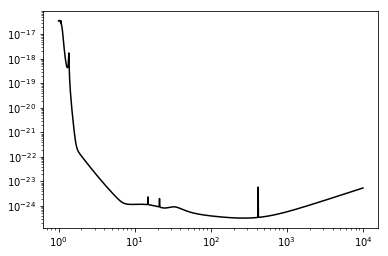

In [1]:
import numpy as np, matplotlib.pyplot as plt, scipy.integrate as INT
%matplotlib inline
Noise_ET=np.loadtxt('ET_D_data.txt')
freq=Noise_ET[:,0]
noise1=Noise_ET[:,1]
noise2=Noise_ET[:,2]
noise3=Noise_ET[:,3]
plt.yscale('log')
plt.xscale('log')
plt.plot(freq,noise3,'k-')#,freq,noise2,'r-',freq,noise3,'b-')

In [2]:
def Sn(f):
    return np.interp(f,freq,noise3**2)

In [3]:
import scipy as sci

In [4]:
######## A table#################
y101=0.6437
y102=0.1469
y103=-0.4098
y104=-0.1331
###############################################
y111=0.827
y112=-0.1228
y113=-0.03523
y114=-0.08172
###############################################
y121=-0.2706
y122=-0.02609
y123=0.1008
y124=0.1451
###############################################
y201=-0.05822
y202=-0.0249
y203=1.829
y204=-0.2714
###############################################
y211=-3.935
y212=0.1701
y213=-0.02017
y214=0.1279
###############################################
y301=-7.092
y302=2.325
y303=-2.87
y304=4.922

x102=-920.9
x112=492.1
x122=135
x202=6742
x212=-1053
x302=-1.34e4
###########################
x103=1.702e4
x113=-9566
x123=-2182
x203=-1.214e5
x213=2.075e4
x303=2.386e5
###########################
x104=-1.254e5
x114=7.507e4
x124=1.338e4
x204=8.735e5
x214=-1.657e5
x304=-1.694e6
###########################
x105=0
x115=0
x125=0
x205=0
x215=0
x305=0
###########################
x106=-8.898e5
x116=6.31e5
x126=5.068e4
x206=5.981e6
x216=-1.415e6
x306=-1.128e7
###########################
x107=8.696e5
x117=-6.71e5
x127=-3.008e4
x207=-5.838e6
x217=1.514e6
x307=1.089e7

In [5]:
def F1(theta,phi,psi):
    plus=-0.433*((1.0+np.cos(theta)**2)*np.sin(2.0*phi)*np.cos(2.0*psi)+2.0*np.cos(theta)*np.cos(2.0*phi)*np.sin(2.0*psi))
    cross=0.433*((1.0+np.cos(theta)**2)*np.sin(2.0*phi)*np.sin(2.0*psi)-2.0*np.cos(theta)*np.cos(2.0*phi)*np.cos(2.0*psi))
    return [plus,cross]
# Mi is the mass of individual BH, in solar masses. chi_i is the reduced spin of BH.
GMsun=1.32754125e26 # cgs unit
DKPC=3.086e+21 # cgs unit
c=3e10 #cgs
def C(M1,M2,Deff,i,theta,phi,psi):
    M=M1+M2
#    factor=M*15.4787466e-6 #second;
    eta=M1*M2/M**2
#    result1=(GMsun*M)**0.83333/(2.0*D*DKPC*2.1433*c**1.5)*\
#    (0.208333*eta)**0.5*np.sqrt((1.0+np.cos(i)**2)**2*F1(theta,phi,psi)[0]**2+\
#                                4.0*np.cos(i)**2*F1(theta,phi,psi)[1]**2)   
    #Deff=D/np.sqrt((0.5*(1.0+np.cos(i)**2))**2*F1(theta,phi,psi)[0]**2+np.cos(i)**2*F1(theta,phi,psi)[1]**2)
    result=0.21*(GMsun*M*0.435)**0.83333/(Deff*DKPC)/c**1.5
    return result
Lorentz = lambda x1,x2,x3: 1.0/3.14159*0.5*x3/((x1-x2)**2+(0.5*x3)**2)
def gamma(f,M1,M2,chi1,chi2): # the input value is with unit Hz    
    M=M1+M2;
    eta=M1*M2/M**2;
    factor=M*15.4787466e-6 #second;
    ft=f*factor # convert the input frequency to a dimensionless one
    delta=(M1-M2)/M; # delta is independent with the total mass
    chi=(1+delta)*chi1*0.5+(1-delta)*chi2*0.5 #spin
    ###############################################
    mu01=1-4.455*(1-chi)**0.217+3.521*(1-chi)**0.26 # independent of the total mass
    mu02=(1-0.63*(1-chi)**0.3)*0.5
    mu03=(1-0.63*(1-chi)**0.3)*(1-chi)**0.45*0.25
    mu04=0.3236+0.04894*chi+0.01346*chi**2
    ###############################################
    f0=np.pi*1e-3
    f1=mu01+y101*eta+y111*eta*chi+y121*eta*chi**2+y201*eta**2+y211*eta**2*chi+y301*eta**3; 
    f2=mu02+y102*eta+y112*eta*chi+y122*eta*chi**2+y202*eta**2+y212*eta**2*chi+y302*eta**3;
    sigma=mu03+y103*eta+y113*eta*chi+y123*eta*chi**2+y203*eta**2+y213*eta**2*chi+y303*eta**3;
    f3=mu04+y104*eta+y114*eta*chi+y124*eta*chi**2+y204*eta**2+y214*eta**2*chi+y304*eta**3;  #these are indepened with the total mass
    ###############################################
    alpha2=-323.0/224+451.0*eta/168.0
    alpha3=(27.0/8-11.0*eta/6.0)*chi
    epsilon1=1.4547*chi-1.8897
    epsilon2=-1.8153*chi-1.6557
    ################################################    
    fp=ft/f1;
    v=ft**0.3333    
    Wm=(1+alpha2*v**2+alpha3*v**3)/(1+epsilon1*v+epsilon2*v**2)
    Wr=Wm*(f2/f1)**(-2.0/3)*(1+epsilon1*v+epsilon2*v**2)/Lorentz(f2,f2,sigma)
    if (ft<f1) and (ft>f0):
        result=(ft/factor)**(-7.0/6)*(1+alpha2*v**2+alpha3*v**3);
    elif (ft>=f1) and (ft<f2):
        result=Wm*(f1/factor)**(-7.0/6)*fp**(-2.0/3)*(1+epsilon1*v+epsilon2*v**2);
    elif ft>=f2 and ft<f3:
        result=Wr*(f1/factor)**(-7.0/6)*Lorentz(ft,f2,sigma)
    else: 
        result=0
    return [result,f1/factor,f2/factor,f3/factor]

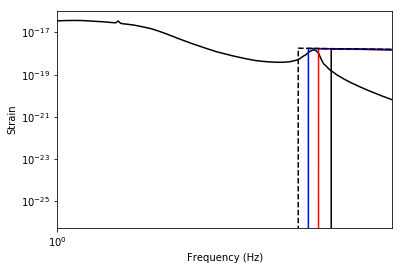

In [72]:
MM=[73,74,75,76]
LS=['k-','r-','b-','k--','r--','b--']
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Strain')
plt.plot(freq,noise3/np.sqrt(freq),'k-')
plt.xlim([1,1.5])
for i in range(0,len(MM)):
    Signal=[C(MM[i],MM[i],1e3,0.,0.,0.,0.)*gamma(f,MM[i],MM[i],0.,0.)[0] for f in freq]
    plt.plot(freq,Signal,LS[i])

In [7]:
# M0=1.5
# chi0=0
# D0=1e3 # in order of Kpc
# factor=2.0*M0*15.4787466e-6 #second;
# def INT(y): 
#         fp=np.exp(y)
#         result=fp*gamma(fp/factor,M0,M0,chi0,chi0)[0]**2/Sn(fp/factor)
#         return result*1e-48
# f0=np.pi*1e-3
# delta=(M0-M0)/(2.0*M0); # delta is independent with the total mass
# chi=chi0
# eta=0.25
# ###############################################
# mu01=1-4.455*(1-chi)**0.217+3.521*(1-chi)**0.26 # independent of the total mass
# mu02=(1-0.63*(1-chi)**0.3)*0.5
# mu03=(1-0.63*(1-chi)**0.3)*(1-chi)**0.45*0.25
# mu04=0.3236+0.04894*chi+0.01346*chi**2
# ###############################################
# f0=np.pi*1e-3
# #f1=mu01+y101*eta+y111*eta*chi+y121*eta*chi**2+y201*eta**2+y211*eta**2*chi+y301*eta**3; 
# #f2=mu02+y102*eta+y112*eta*chi+y122*eta*chi**2+y202*eta**2+y212*eta**2*chi+y302*eta**3;
# #sigma=mu03+y103*eta+y113*eta*chi+y123*eta*chi**2+y203*eta**2+y213*eta**2*chi+y303*eta**3;
# f3=mu04+y104*eta+y114*eta*chi+y124*eta*chi**2+y204*eta**2+y214*eta**2*chi+y304*eta**3;  

In [8]:
# ylow=np.log(f0)
# yhigh=np.log(f3)
# rhosq=sci.integrate.quad(INT,ylow,yhigh)
# rhosq=4.0*C(M0,M0,D0,0,0,0,0)**2*rhosq[0]*1e48/factor
# rho=np.sqrt(rhosq)
# print("SNR=%e" % rho)

NameError: name 'f0' is not defined

In [58]:
def rho0M(Mchirp,D0=1e3): #input red-shifted chirp mass (solar mass), give you the standard SNR
    m0=Mchirp/0.87; # from chirp mass to individual mass of an equal mass binary.
    factor=2.0*m0*15.4787466e-6 #second;
    f0=np.pi*1e-3
    delta=0; # delta is independent with the total mass
    chi=0;
    eta=0.25
    def INTT(y): 
        fp=np.exp(y)
        if fp/factor>min(freq)+2.:
            result=fp*gamma(fp/factor,m0,m0,chi,chi)[0]**2/Sn(fp/factor)
        else:
            result=0
        return result*1e-48
    ###############################################
    mu01=1-4.455*(1-chi)**0.217+3.521*(1-chi)**0.26 # independent of the total mass
    mu02=(1-0.63*(1-chi)**0.3)*0.5
    mu03=(1-0.63*(1-chi)**0.3)*(1-chi)**0.45*0.25
    mu04=0.3236+0.04894*chi+0.01346*chi**2
    ###############################################
    f3=mu04+y104*eta+y114*eta*chi+y124*eta*chi**2+y204*eta**2+y214*eta**2*chi+y304*eta**3;  
    ylow=max(np.log(f0),np.log(min(freq*factor)))
    yhigh=np.log(f3)    
    rhosq=sci.integrate.quad(INTT,ylow,yhigh)
    rho=np.sqrt(4.0*C(m0,m0,D0,0,0,0,0)**2*rhosq[0]*1e48/factor)
    #rho=np.sqrt(rhosq)
    #print(ylow,yhigh)
    #rho=np.sqrt(4.0*C(m0,m0,D0,0,0,0,0)**2*rhosq[0]*1e48)
    return rho

In [69]:
rho0M(74)
# Sn(np.exp(-5.)/4800.4787466e-6)*1e48
# #print(np.exp(-2.)/60.4787466e-6)

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


1322522.8478091469

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


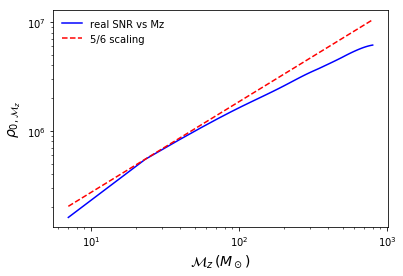

In [75]:
Mz=np.linspace(7,800.,50);
RHO=[rho0M(mz) for mz in Mz];
RHO2=[rho0M(20.)*(mz/20.)**0.8333 for mz in Mz];
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\mathcal{M}_z\,(M_\odot)$',fontsize=14)
plt.ylabel(r'$\rho_{0,\mathcal{M}_z}$',fontsize=14)
plt.plot(Mz,RHO,'b',label='real SNR vs Mz')
plt.plot(Mz,RHO2,'r--',label='5/6 scaling')
plt.legend(frameon=False)
plt.savefig('MvsSNR.eps')

In [ ]:
GWtool_BHB.rho0M(1.31)

In [ ]:
GWtool_BHB.initialMtable()